# Life Expectancy Data Science Project

Data Set is obtainted from WHO, source [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Describing datasets
First step is calculating facts and visualizing our dataset - this will help us determine to what dept we should go with cleaning our data.

In [254]:
df = pd.read_csv("./data/LifeExpectancyData.csv", delimiter=',')
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


For more detailed statistics about our dataset, like how many rows in column are unique (for categorical dataset), which values are the most common...For numerical columns, we also get basic statistics calculated like mean, standard deviation, min value, and also quantil values.

In [255]:
df.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


As we can see, only two columns are categorical - `Country` and `Status`. Country is pretty much difficult to visualize, as there are 193 values. But we can use histogram for visualization of column `Status`. I choose to visualize it with percent, I don't need to know exact count of each value in this column.

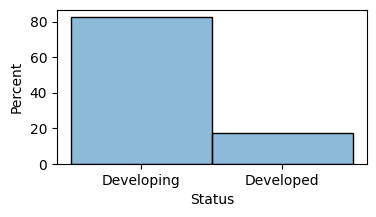

In [256]:
plt.figure(figsize=(4,2))
sns.histplot(df.Status,  stat="percent", discrete=True, alpha=0.5)
plt.show()

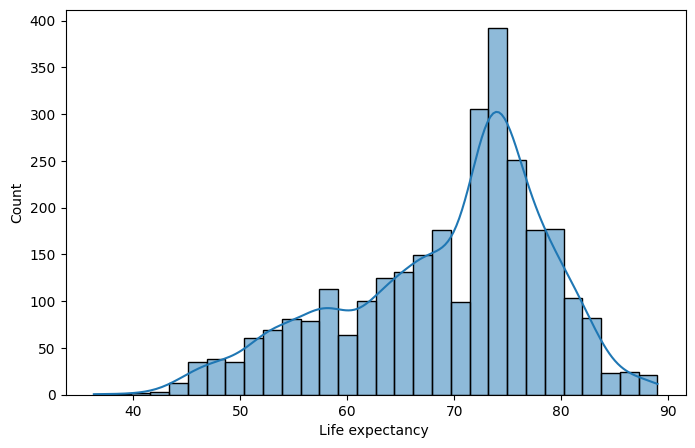

In [257]:
plt.figure(figsize=(8,5))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.show()

It is possible to create more complex graph, eg. `Box plot` for visualizating some more complex relationships between data. For example, in the next graph, there is visualized life expectancy by year.

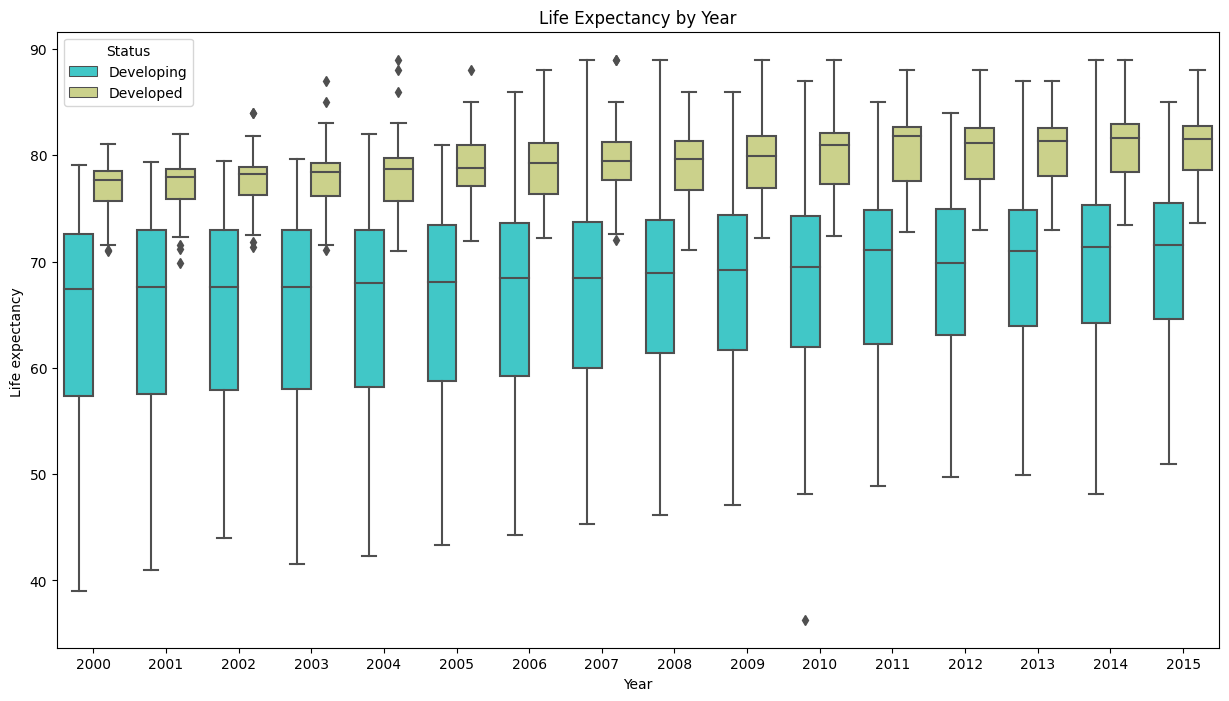

In [258]:
plt.figure(figsize=(15,8))
plt.title("Life Expectancy by Year")
sns.boxplot(x='Year',y='Life expectancy ',data=df, palette='rainbow', hue='Status')
plt.show()

## Cleaning data
### Missing values
There are two strategies to handle missing values:
 - delete rows containing missing values - generally not the best solution, mostly when dealing with smaller datasets - we could delete some useful data, or make more unweighted dataset
 - fill them with some value
        -  with constant
        -  with mean
        -  with mode
        -  with median
        -  with previous/next value
        -  with most frequent value (categorical data)
        -  with some new default value, eg. `Missing` (categorical data)
         - using more complex techniques for filling (eg. if there is some correlation between columns, we could use kNN for computing them)

In [259]:
# getting number of null values in each column
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [260]:
# Filling missing values
imputer = SimpleImputer()
df['Life expectancy '] = imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality'] = imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol'] = imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B'] = imputer.fit_transform(df[['Hepatitis B']])
df[' BMI '] = imputer.fit_transform(df[[' BMI ']])
df['under-five deaths '] = imputer.fit_transform(df[['under-five deaths ']])
df['Total expenditure'] = imputer.fit_transform(df[['Total expenditure']])
df['Polio'] = imputer.fit_transform(df[['Polio']])
df['Diphtheria '] = imputer.fit_transform(df[['Diphtheria ']])
df['GDP'] = imputer.fit_transform(df[['GDP']])
df['Population'] = imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years'] = imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years'] = imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources'] = imputer.fit_transform(df[['Income composition of resources']])
df['Schooling'] = imputer.fit_transform(df[['Schooling']])

In [261]:
# verifying that there are no more null values in dataframe
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Outliers
In this part, we will look for outliers (extreme values) in the dataset - this values can move results in one or the other direction.

In [262]:
# We find if our dataset contains outliers - not for categorical data
df.describe()[['Year', 'Life expectancy ', 'Adult Mortality','infant deaths','Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ','under-five deaths ','Polio','Total expenditure', 'Diphtheria ',' HIV/AIDS','GDP','Population', ' thinness 5-9 years', ' thinness  1-19 years', 'Income composition of resources','Schooling']]


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,thinness 1-19 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.870317,4.839704,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.482708,4.394535,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.200000,7.100000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,28.600000,27.700000,0.948000,20.700000


### Visualization techniques for finding out outliers - Boxplot
Boxplot is great visualization technique for determining if our column has some outliers - in the main box, we can see values between 25th (Q1) and 75th (Q3) percentile, the line visualize median - this box is called Interquartile range (IQR). We determine which values are outliers by determining "minimum" (Q1 - 1.5 * IQR) and "maximum" (Q3 + 1.5 * IQR).

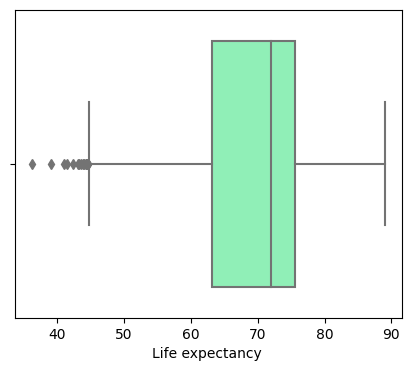

In [263]:
# demonstrating boxplot on column Life expectancy

plt.figure(figsize=(5,4))
sns.boxplot(x='Life expectancy ',data=df, palette='rainbow')
plt.show()

In [264]:
# The same can be done on our dataset for getting exact values of our outliers
# also demonstrated on our column Life expectancy
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

find_outliers_IQR(df['Life expectancy '])

1127    36.3
1484    44.5
1582    44.6
1583    44.0
1584    43.5
1585    43.1
2306    44.3
2307    43.3
2308    42.3
2309    41.5
2311    41.0
2312    39.0
2920    44.6
2921    43.8
2932    44.6
2933    44.3
2934    44.5
Name: Life expectancy , dtype: float64

#### Solving outliers

There are also multiple possibilities how to solve outliers, for example we can:
- remove them - drop the rows containing outliers
- cap them - for example, if we decide that max cap will be mean + 3*std, than everything above will be set to this mean
- replace them - as if they are missing values

For now, I won't be manipulating anyhow with this missing values.

### Solving categorical data
As I decided to use linear regression as our model, this algorithm can not work with not-numerical data. Because of that, we need to transform this columns (Year, Status) to something, with which our model could work.

In [265]:
# getting dummies
country_dummy = pd.get_dummies(df['Country'])
status_dummy = pd.get_dummies(df['Status'])

# dropping original columns
df.drop(['Country', 'Status'], inplace=True, axis=1)


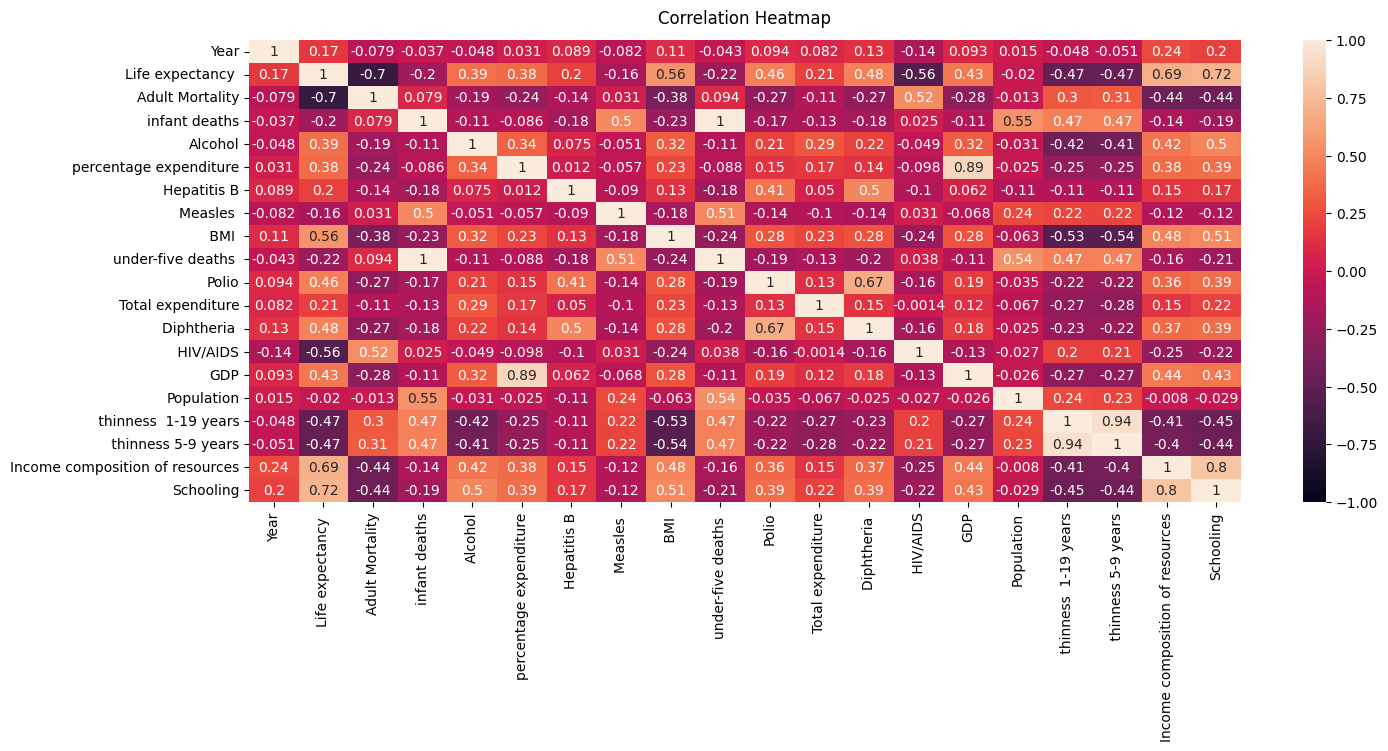

In [266]:
# next we should concatenate  our dataset with dummies values, but first, we will visualize correlation in dataset to help us determine which columns have correlations - so we can know which columns are best for using for our model.

# visualizing correlation
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Based on this correlation heat-map, we can see strong (> 0.6) positive correlation between:
- under-five deaths and infant deaths (1)
- thinness 1-19 years and thinness 5-9 years (0.94)
- GDP and Percentage expenditure (0.89)
- Income composition of resources and Schooling (0.8)
- Schooling and Life expectancy (0.72)
- Income composition of resources and Life expectancy (0.69)
- Diptheria and Polio (0.67)

In [267]:
# concatenating dummy columns with our original dataset
df = pd.concat([df, country_dummy, status_dummy], axis=1)
df.head(10)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
5,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102.0,...,False,False,False,False,False,False,False,False,False,True
6,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106.0,...,False,False,False,False,False,False,False,False,False,True
7,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110.0,...,False,False,False,False,False,False,False,False,False,True
8,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113.0,...,False,False,False,False,False,False,False,False,False,True
9,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116.0,...,False,False,False,False,False,False,False,False,False,True


Before starting to create our models, we will split our dataset to train and test.

In [268]:
# our dependant variable (variable which we will be estimating with our models) will be life expectancy
y = df['Life expectancy ']
x = df.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

# Linear Regression
Now that we know some things about our dataset and we prepared it, we move to more complicated part and learn machine learning models on this dataset.

We use Linear Regression if we assume linear relationship between dependent variable y and one (or more) independent variables x. In linear regression we try to find the best values for coeficients in our equation. For this we use method of Ordinary least squares.


## Simple Linear Regression
Simple linear regression means, that dependant variable y depends only on one independant variable x. Like in every type of linear regression, we are trying to find coeficients b0 and b1 for equation:
```
y = b0 + b1 * x
```
The value of b0, also called the intercept, shows the point where the estimated regression line crosses the y axis. It’s the value of the estimated response y for x = 0. The value of b1 determines the slope of the estimated regression line.

Intercept: 43.52217241148958
Beta coeficients (slope): [2.13518872]
####################################################################################################
Examples of predicting values using our trained model: 
Number of years of Schooling = 7, Predicted life expectancy = 58.46849342502383
Number of years of Schooling = 5.5, Predicted life expectancy = 55.26571035069506
Number of years of Schooling = 23, Predicted life expectancy = 92.6315128845307
####################################################################################################


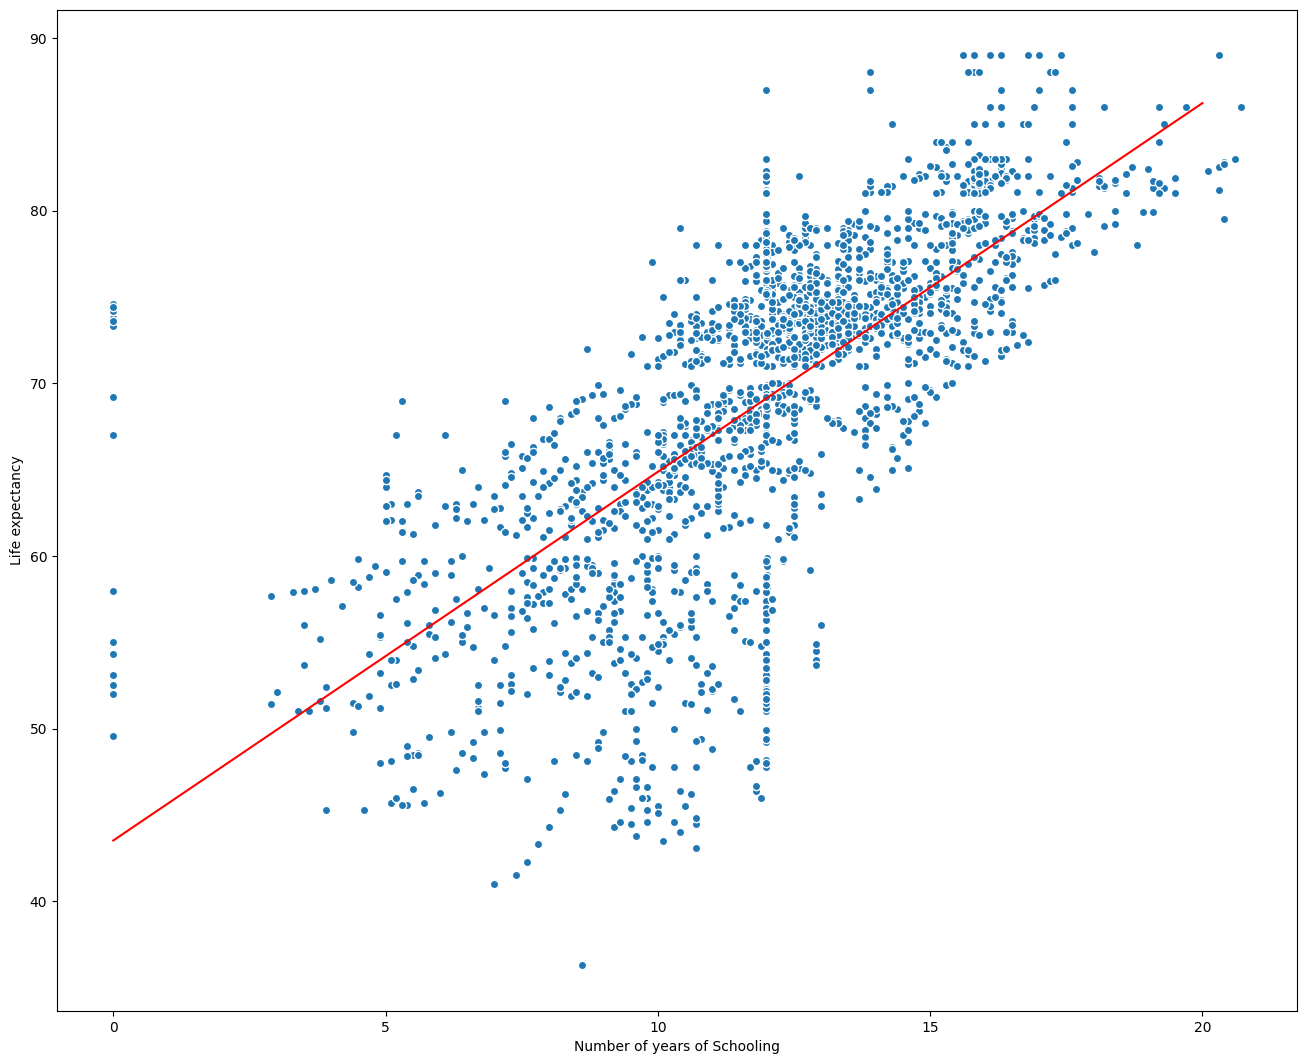

In [269]:
# We will use two columns: Life expectancy as our dependant variable and Schooling as our independent variable
x = X_train['Schooling']

lr_model = LinearRegression()
lr_model.fit(x.values.reshape(-1,1), y_train)
print('Intercept: ' + str(lr_model.intercept_))
print('Beta coeficients (slope): ' + str(lr_model.coef_))

# Example of predicting values:
print("#" * 100)
print("Examples of predicting values using our trained model: ")
print('Number of years of Schooling = 7, Predicted life expectancy = ' + str(lr_model.predict(([[7]]))[0]))
print('Number of years of Schooling = 5.5, Predicted life expectancy = ' + str(lr_model.predict(([[5.5]]))[0]))
print('Number of years of Schooling = 23, Predicted life expectancy = ' + str(lr_model.predict(([[23]]))[0]))
print("#" * 100)

# visualizing the model and data
x_arr = np.arange(min(x), max(x)).reshape(-1,1)
plt.figure(figsize=(16, 13))

plt.scatter(x, y_train, edgecolors='white')

y_head = lr_model.predict(x_arr)
plt.plot(x_arr, y_head, color='red')
plt.xlabel('Number of years of Schooling')
plt.ylabel('Life expectancy')
plt.show()

### Model evaluation
We can use 3 primary metrics for evaluating our linear model:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)

**MAE**: Average error
**MSE**: similar to MAE, but noise is exaggerated. Results is not in base units.
**RMSE**: similar to MSE, result is square rooted to make it more interpretable.

As each error, we want our model to give us lower values. We will use this error values in the end for comparing our model of simple linear regression and our model of multiple linear regression.

In [270]:
x_test = X_test['Schooling']
y_pred = lr_model.predict(x_test.values.reshape(-1,1))

print("MAE: " + str(metrics.mean_absolute_error(y_test.values, y_pred)))
print("MSE: "+ str(metrics.mean_squared_error(y_test.values, y_pred)))
print("RMSE: " + str(metrics.mean_squared_error(y_test.values, y_pred)**0.5))

MAE: 4.740327839464665
MSE: 41.635036035779216
RMSE: 6.452521680380409


## Multiple Linear Regression (2 features)

It is a variant of linear regression, where we use two or more independent variables for calculating our dependent variable.
For example, with two independent variables, our estimated regression function is:
```
y = b0 + b1*x1 + b2*x2
```

In [271]:
# We will use two columns: Life expectancy as our dependant variable and Schooling as our independent variable
x = X_train[['Schooling', 'Income composition of resources']]

lr_model = LinearRegression()
lr_model.fit(x.values, y_train)
print('Intercept: ' + str(lr_model.intercept_))
print('Beta coeficients (slope): ' + str(lr_model.coef_))
print("\n")

# Example of predicting values:
print("#" * 100)
print("Examples of predicting values using our trained model: ")
print('Number of years of Schooling = 7, Income composition of resources = 0.6, \n Predicted life expectancy = ' + str(lr_model.predict(([[7, 0.6]]))[0]))
print('Number of years of Schooling = 7, Income composition of resources = 0.3, \n Predicted life expectancy = ' + str(lr_model.predict(([[7, 0.3]]))[0]))
print('Number of years of Schooling = 5.5, Income composition of resources = 0.6, \n Predicted life expectancy = ' + str(lr_model.predict(([[5.5, 0.6]]))[0]))
print('Number of years of Schooling = 23, Income composition of resources = 0.6, \n Predicted life expectancy = ' + str(lr_model.predict(([[23, 0.6]]))[0]))
print("#" * 100)

x_test = X_test[['Schooling', 'Income composition of resources']]
y_pred = lr_model.predict(x_test)

print("\n")
print("MAE: " + str(metrics.mean_absolute_error(y_test.values, y_pred)))
print("MSE: "+ str(metrics.mean_squared_error(y_test.values, y_pred)))
print("RMSE: " + str(metrics.mean_squared_error(y_test.values, y_pred)**0.5))


Intercept: 43.08110284987987
Beta coeficients (slope): [ 1.3661768  15.42593105]


####################################################################################################
Examples of predicting values using our trained model: 
Number of years of Schooling = 7, Income composition of resources = 0.6, 
 Predicted life expectancy = 61.899899088804716
Number of years of Schooling = 7, Income composition of resources = 0.3, 
 Predicted life expectancy = 57.27211977255137
Number of years of Schooling = 5.5, Income composition of resources = 0.6, 
 Predicted life expectancy = 59.850633887429396
Number of years of Schooling = 23, Income composition of resources = 0.6, 
 Predicted life expectancy = 83.75872790347479
####################################################################################################


MAE: 4.3636232413543246
MSE: 37.6460394794977
RMSE: 6.135636843840882


D:\Data_Science\First\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Multiple linear regression (All features)

We can see that when we used 2 independent values (Schooling, Income composition of resources) to train our model, the value of error was decreasing - we trained better model.
So, as the last model, we use for training our model of linear regression all features in our dataset.

In [272]:
# We will use two columns: Life expectancy as our dependant variable and Schooling as our independent variable
x = X_train

lr_model = LinearRegression()
lr_model.fit(x.values, y_train)
print('Intercept: ' + str(lr_model.intercept_))
print('Beta coeficients (slope): ' + str(lr_model.coef_))
# print("\n")
#
# # Example of predicting values:
# print("#" * 100)
# print("Examples of predicting values using our trained model: ")
# print('Number of years of Schooling = 7, Income composition of resources = 0.6, \n Predicted life expectancy = ' + str(lr_model.predict(([[7, 0.6]]))[0]))
# print('Number of years of Schooling = 7, Income composition of resources = 0.3, \n Predicted life expectancy = ' + str(lr_model.predict(([[7, 0.3]]))[0]))
# print('Number of years of Schooling = 5.5, Income composition of resources = 0.6, \n Predicted life expectancy = ' + str(lr_model.predict(([[5.5, 0.6]]))[0]))
# print('Number of years of Schooling = 23, Income composition of resources = 0.6, \n Predicted life expectancy = ' + str(lr_model.predict(([[23, 0.6]]))[0]))
# print("#" * 100)

x_test = X_test
y_pred = lr_model.predict(x_test)

print("\n")
print("MAE: " + str(metrics.mean_absolute_error(y_test.values, y_pred)))
print("MSE: "+ str(metrics.mean_squared_error(y_test.values, y_pred)))
print("RMSE: " + str(metrics.mean_squared_error(y_test.values, y_pred)**0.5))


Intercept: -457.28267825294597
Beta coeficients (slope): [ 2.63644186e-01 -2.40133933e-03  1.08407318e-01 -7.83409010e-02
  1.30738842e-04 -2.95212668e-03 -8.22343006e-06 -2.12118142e-03
 -8.20382167e-02  3.74677522e-03 -8.96050435e-03  7.06028647e-03
 -3.11921430e-01 -1.09325903e-05  1.61648472e-10 -1.20523565e-02
  5.69775053e-02 -6.17774814e-01  1.54759930e-01 -9.19236875e+00
  6.84769753e+00  4.69103397e+00 -1.56854419e+01  7.30302484e+00
  6.53967233e+00  5.16622532e+00  2.18934844e+00  3.22964373e+00
  2.14940945e+00  6.76677794e+00  6.95653067e+00  7.26011894e-01
  6.36158500e+00  2.52950668e+00  2.34057827e+00  1.63617883e+00
 -9.15498984e+00 -2.90262789e+00 -6.39343768e-01  7.84883316e+00
 -6.96377799e+00  4.19737058e+00  7.60375084e+00 -5.65427043e+00
 -9.20182838e+00 -1.11025996e+01  4.24190256e+00 -3.50378799e+00
 -1.05605198e+01  1.29552181e+01 -1.59255027e+01 -1.41953134e+01
  1.12294446e+01  3.33281451e+00  5.05269325e+00 -6.40929083e+00
 -6.69514339e+00 -3.81780877e-01 

D:\Data_Science\First\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(




MAE: 1.213982366962
MSE: 3.683311181186327
RMSE: 1.9191954515333574


# Results

To summarize, in this notebook I prepared dataset and trained multiple Linear regression models. We can see, that the worst results gave the simple linear regression (doesn't mean it is bad, it would probably just need more data to give better results).
When implementing multiple linear regression, we can see that the error was minimalizing - and, that means our model was getting better and better.

In the future, there could be implemented more machine learning models for predicting life expectancy based on this dataset, but this notebook is just an example how to implement simple data preparation and simple regression models.

By: Magdalena Ondruskova (maggie.ondruskova@gmail.com)
Date: 03.05.2023